In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Mar  4 14:52:43 2020
@author: nooryoussef
"""
import numpy as np
import pandas as pd
import misc_functions as mf
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
#edit color map range ## 
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

Oranges_all = cm.get_cmap('Oranges', 512)
newcmp = ListedColormap(Oranges_all(np.linspace(0, 0.7, 256)))

In [3]:
ddG_avgdH = pd.read_csv("../data/1pek_t25_ddG_avgdH_Pneg.csv")

qhw_dG_avgH = pd.read_csv("../data/1qhw_dG_avgH_t2.csv")
pek_dG_avgH = pd.read_csv("../data/1pek_dG_avgH_t25.csv")
ppn_dG_avgH = pd.read_csv("../data/2ppn_dG_avgH_t151.csv")

In [4]:
ddG_avgdH

,Unnamed: 0,ddG,avg dH,Percent neg
0,0,-0.478308,0.302062,0.756272
1,1,-0.244880,0.148843,0.856631
2,2,0.097114,-0.060672,0.318996
3,3,-0.328940,0.190816,0.928315
4,4,0.138921,-0.072309,0.286738
...,...,...,...,...
255,255,-1.026852,0.591174,0.659498
256,256,0.370932,-0.216302,0.222222
257,257,0.151768,-0.088169,0.397849
258,258,0.393825,-0.217816,0.412186


/Users/nooryoussef/miniconda3/envs/py374/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


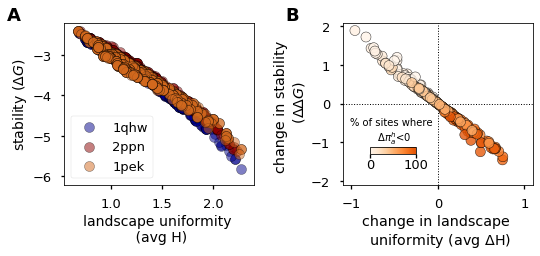

In [7]:
plt.style.use('seaborn-talk')
c = ['darkblue', 'darkred', 'chocolate']
l = ['1qhw', '2ppn', '1pek']


f, (ax1, ax2) = plt.subplots(1, 2, figsize = (8,4))

#subplot A
sc = ax1.scatter(x=qhw_dG_avgH["avg H"], y=qhw_dG_avgH["dG"], c = c[0],s = 100, label = l[0], edgecolor = 'k', linewidth=0.5, marker="o", alpha = 0.5)
sc = ax1.scatter(x=pek_dG_avgH["avg H"], y=pek_dG_avgH["dG"], c = c[1],s = 100, label = l[1], edgecolor = 'k', linewidth=0.5, marker="o", alpha = 0.5)
sc = ax1.scatter(x=ppn_dG_avgH["avg H"], y=ppn_dG_avgH["dG"], c = c[2],s = 100, label = l[2], edgecolor = 'k', linewidth=0.5, marker="o", alpha = 0.5)

# labels 
ax1.set_xlabel("landscape uniformity \n (avg H)",fontsize = 14)
ax1.set_ylabel("stability ($\Delta G$)", fontsize = 14)
ax1.set_ylim(-6.2,-2.2)


ax1.legend()

sc = ax2.scatter(x=ddG_avgdH["avg dH"], y=ddG_avgdH["ddG"], c=[i*100 for i in ddG_avgdH["Percent neg"]], s = 100, cmap = newcmp,
             edgecolor= 'k',linewidth=0.5, marker="o", alpha = 0.8)

# labels 
ax2.set_xlabel("change in landscape \n uniformity (avg $\Delta$H)")
ax2.set_ylabel("change in stability \n ($\Delta \Delta G$)")

cbaxes = f.add_axes([0.68, 0.4, 0.08, 0.023]) 
cbar= plt.colorbar(sc, orientation = "horizontal", cax = cbaxes)
cbar.ax.set_title("% of sites where \n $\Delta \pi_a^h$<0", fontsize = 10)
cbar.ax.xaxis.set_tick_params(pad=0.7)

ax2.axhline(0, color = 'k', linestyle = ":", linewidth = 1, zorder = 0)    
ax2.axvline(0, color = 'k', linestyle = ":", linewidth = 1, zorder = 0)  
ax2.set_ylim(-2.1, 2.1)
ax2.set_xlim(-1.1, 1.1)


ax1.text(-0.3, 1.1, "A", transform=ax1.transAxes, fontsize=18, fontweight='bold', va='top')
ax2.text(-0.3, 1.1, "B", transform=ax2.transAxes, fontsize=18, fontweight='bold', va='top')

plt.tight_layout(pad=2)

#plt.savefig('../figures/Figure6.png', dpi = 450)
